In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
#unificar datasets
import glob

In [4]:
archivos_csv = []
for nombre_archivo in glob.glob('*.csv'):
    archivos_csv.append(nombre_archivo)

In [5]:
datos_combinados = pd.DataFrame()
datos_lista = []

for archivo_csv in archivos_csv:
    datos = pd.read_csv(archivo_csv)
    datos_lista.append(datos)

datos_combinados = pd.concat(datos_lista, ignore_index=True)



In [6]:
datos_combinados.to_csv('venta_mercado.csv', index=False)

In [7]:
#Carga de dataset
data = pd.read_csv('/content/venta_mercado.csv')

In [8]:
print(data)

      ProductID  Weight FatContent  ProductVisibility            ProductType  \
0         FDA15    9.30    Low Fat           0.016047                  Dairy   
1         DRC01    5.92    Regular           0.019278            Soft Drinks   
2         FDN15   17.50    Low Fat           0.016760                   Meat   
3         FDX07   19.20    Regular           0.000000  Fruits and Vegetables   
4         NCD19    8.93    Low Fat           0.000000              Household   
...         ...     ...        ...                ...                    ...   
14199     FDB58   10.50    Regular           0.013496            Snack Foods   
14200     FDD47    7.60    Regular           0.142991          Starchy Foods   
14201     NCO17   10.00    Low Fat           0.073529     Health and Hygiene   
14202     FDJ26   15.30    Regular           0.000000                 Canned   
14203     FDU37    9.50    Regular           0.104720                 Canned   

            MRP OutletID  Establishment

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          14204 non-null  object 
 1   Weight             11765 non-null  float64
 2   FatContent         14204 non-null  object 
 3   ProductVisibility  14204 non-null  float64
 4   ProductType        14204 non-null  object 
 5   MRP                14204 non-null  float64
 6   OutletID           14204 non-null  object 
 7   EstablishmentYear  14204 non-null  int64  
 8   OutletSize         10188 non-null  object 
 9   LocationType       14204 non-null  object 
 10  OutletType         14204 non-null  object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [10]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [11]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [12]:
#llenar datos vacios
columnas_especificas = ['Weight', 'OutletSize','OutletSales']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [13]:
#resultado
print(data)

       ProductID  Weight  FatContent  ProductVisibility  ProductType  \
0            156    9.30           1           0.016047            4   
1              8    5.92           2           0.019278           14   
2            662   17.50           1           0.016760           10   
3           1121   19.20           2           0.000000            6   
4           1297    8.93           1           0.000000            9   
...          ...     ...         ...                ...          ...   
14199        233   10.50           2           0.013496           13   
14200        308    7.60           2           0.142991           15   
14201       1426   10.00           1           0.073529            8   
14202        521   15.30           2           0.000000            3   
14203        997    9.50           2           0.104720            3   

            MRP  OutletID  EstablishmentYear  OutletSize  LocationType  \
0      249.8092         9               1999           1     

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          14204 non-null  int64  
 1   Weight             14204 non-null  float64
 2   FatContent         14204 non-null  int64  
 3   ProductVisibility  14204 non-null  float64
 4   ProductType        14204 non-null  int64  
 5   MRP                14204 non-null  float64
 6   OutletID           14204 non-null  int64  
 7   EstablishmentYear  14204 non-null  int64  
 8   OutletSize         14204 non-null  int64  
 9   LocationType       14204 non-null  int64  
 10  OutletType         14204 non-null  int64  
 11  OutletSales        14204 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 1.3 MB


In [15]:
# Obtener la columna que deseas mover
columna_a_mover = data.pop('MRP')

# Agregar la columna al final del DataFrame
data['MRP'] = columna_a_mover

# Generar un nuevo dataset con la columna movida
nuevo_dataset = data.copy()

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_dataset.to_csv('venta_mercado2.csv', index=False)

print("Archivo 'venta_mercado2.csv' creado exitosamente.")

Archivo 'venta_mercado2.csv' creado exitosamente.


In [16]:
#Carga de dataset
data = pd.read_csv('/content/venta_mercado2.csv')

In [17]:
# Lectura de Datos
X = data.iloc[:, :11]
y = data.iloc[:, 11]
m = y.size

In [18]:
print(X)
print('*'*25)
print(y)

       ProductID  Weight  FatContent  ProductVisibility  ProductType  \
0            156    9.30           1           0.016047            4   
1              8    5.92           2           0.019278           14   
2            662   17.50           1           0.016760           10   
3           1121   19.20           2           0.000000            6   
4           1297    8.93           1           0.000000            9   
...          ...     ...         ...                ...          ...   
14199        233   10.50           2           0.013496           13   
14200        308    7.60           2           0.142991           15   
14201       1426   10.00           1           0.073529            8   
14202        521   15.30           2           0.000000            3   
14203        997    9.50           2           0.104720            3   

       OutletID  EstablishmentYear  OutletSize  LocationType  OutletType  \
0             9               1999           1             

In [19]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [20]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       ProductID  Weight  FatContent  ProductVisibility  ProductType  \
0            156    9.30           1           0.016047            4   
1              8    5.92           2           0.019278           14   
2            662   17.50           1           0.016760           10   
3           1121   19.20           2           0.000000            6   
4           1297    8.93           1           0.000000            9   
...          ...     ...         ...                ...          ...   
14199        233   10.50           2           0.013496           13   
14200        308    7.60           2           0.142991           15   
14201       1426   10.00           1           0.073529            8   
14202        521   15.30           2           0.000000            3   
14203        997    9.50           2           0.104720            3   

       OutletID  EstablishmentYear  OutletSize  LocationType  OutletType  \
0             9               1999           1             

In [21]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [22]:
print(X)

[[ 1.00000000e+00 -1.38831978e+00 -8.24938722e-01 ... -1.36928630e+00
  -2.52702417e-01  1.17553945e+00]
 [ 1.00000000e+00 -1.71749847e+00 -1.62322365e+00 ...  1.09156555e+00
   1.00276633e+00 -1.31475456e+00]
 [ 1.00000000e+00 -2.62884524e-01  1.11172885e+00 ... -1.36928630e+00
  -2.52702417e-01 -6.35631532e-02]
 ...
 [ 1.00000000e+00  1.43638925e+00 -6.59613442e-01 ... -1.38860375e-01
  -2.52702417e-01  3.44031770e-16]
 [ 1.00000000e+00 -5.76493952e-01  5.92135112e-01 ... -1.38860375e-01
  -2.52702417e-01  3.44031770e-16]
 [ 1.00000000e+00  4.82215889e-01 -7.77702928e-01 ... -1.38860375e-01
  -2.52702417e-01  3.44031770e-16]]


In [23]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [24]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [140.05726702   0.52430952   1.72887364  -0.28253944   1.05190818
   2.32997881  -3.3444568    0.1642657    0.58163618  -0.63456762
  -7.78837015  29.95458383]
El valor predecido es (usando el descenso por el gradiente): 107.8021


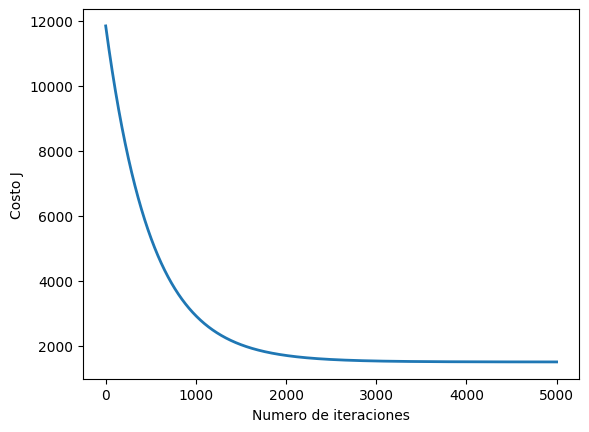

In [25]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio de venta del mercado con distintas caracteristicas
X_array = [1, 12, 7.20, 1, 0.019278, 15, 4, 2010, 2, 0, 1, 563.4288]
X_array[1:12] = (X_array[1:12] - mu) / sigma
MRP = np.dot(X_array, theta)

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(MRP))

In [26]:
X_array = [1, 12, 7.20, 1, 0.019278, 15, 4, 2010, 2, 0, 1, 563.4288]
X_array[1:12] = (X_array[1:12] - mu) / sigma

In [27]:
X_array[1:12]

[-1.7086017439845411,
 -1.3209145644516085,
 -0.5738137388268035,
 -0.9070675744405146,
 1.8442991062468852,
 -0.25466062279572194,
 1.4536831732124034,
 0.2665678892659796,
 -1.3692863045732147,
 -0.2527024172133791,
 -1.2239659613297467]

In [28]:
#Carga de dataset
data = pd.read_csv('/content/venta_mercado2.csv')

In [29]:
print(data)

       ProductID  Weight  FatContent  ProductVisibility  ProductType  \
0            156    9.30           1           0.016047            4   
1              8    5.92           2           0.019278           14   
2            662   17.50           1           0.016760           10   
3           1121   19.20           2           0.000000            6   
4           1297    8.93           1           0.000000            9   
...          ...     ...         ...                ...          ...   
14199        233   10.50           2           0.013496           13   
14200        308    7.60           2           0.142991           15   
14201       1426   10.00           1           0.073529            8   
14202        521   15.30           2           0.000000            3   
14203        997    9.50           2           0.104720            3   

       OutletID  EstablishmentYear  OutletSize  LocationType  OutletType  \
0             9               1999           1             

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          14204 non-null  int64  
 1   Weight             14204 non-null  float64
 2   FatContent         14204 non-null  int64  
 3   ProductVisibility  14204 non-null  float64
 4   ProductType        14204 non-null  int64  
 5   OutletID           14204 non-null  int64  
 6   EstablishmentYear  14204 non-null  int64  
 7   OutletSize         14204 non-null  int64  
 8   LocationType       14204 non-null  int64  
 9   OutletType         14204 non-null  int64  
 10  OutletSales        14204 non-null  float64
 11  MRP                14204 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 1.3 MB


In [37]:
# Lectura de Datos
X = data.iloc[:, :11]
y = data.iloc[:, 11]
m = y.size

In [38]:
print(X)
print('*'*25)
print(y)

       ProductID  Weight  FatContent  ProductVisibility  ProductType  \
0            156    9.30           1           0.016047            4   
1              8    5.92           2           0.019278           14   
2            662   17.50           1           0.016760           10   
3           1121   19.20           2           0.000000            6   
4           1297    8.93           1           0.000000            9   
...          ...     ...         ...                ...          ...   
14199        233   10.50           2           0.013496           13   
14200        308    7.60           2           0.142991           15   
14201       1426   10.00           1           0.073529            8   
14202        521   15.30           2           0.000000            3   
14203        997    9.50           2           0.104720            3   

       OutletID  EstablishmentYear  OutletSize  LocationType  OutletType  \
0             9               1999           1             

In [39]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [40]:
# importante que para usar m>n, evitar datos redundantes, no se normaliza
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [41]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio de venta de un producto en el mercado

X_array = [1, 12, 7.20, 1, 0.019278, 15, 4, 2010, 2, 0, 1, 563.4288]
MRP = np.dot(X_array, theta)

print('Precio predecido (usando la ecuación de la normal) es: ${:.0f}'.format(MRP))

Theta calculado a partir de la ecuación de la normal: [ 1.99277483e+01  1.14828212e-03  4.07796450e-01 -4.62310959e-01
  1.99809538e+01  5.51255842e-01 -8.67908004e-01  3.85211674e-02
  7.86435870e-02  7.23907145e-01 -1.16908450e+01  2.31680139e-02]
Precio predecido (usando la ecuación de la normal) es: $107
